In [1]:
import numpy as np
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/a2rlab/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/a2rlab/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/a2rlab/.local/lib/python3.10/site-pac

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [42]:
baseline = np.load('data/positions_batchctrl_1_fig8_cut.npy')
t2  = np.load('data/positions_batchctrl_8_fig8_cut.npy')

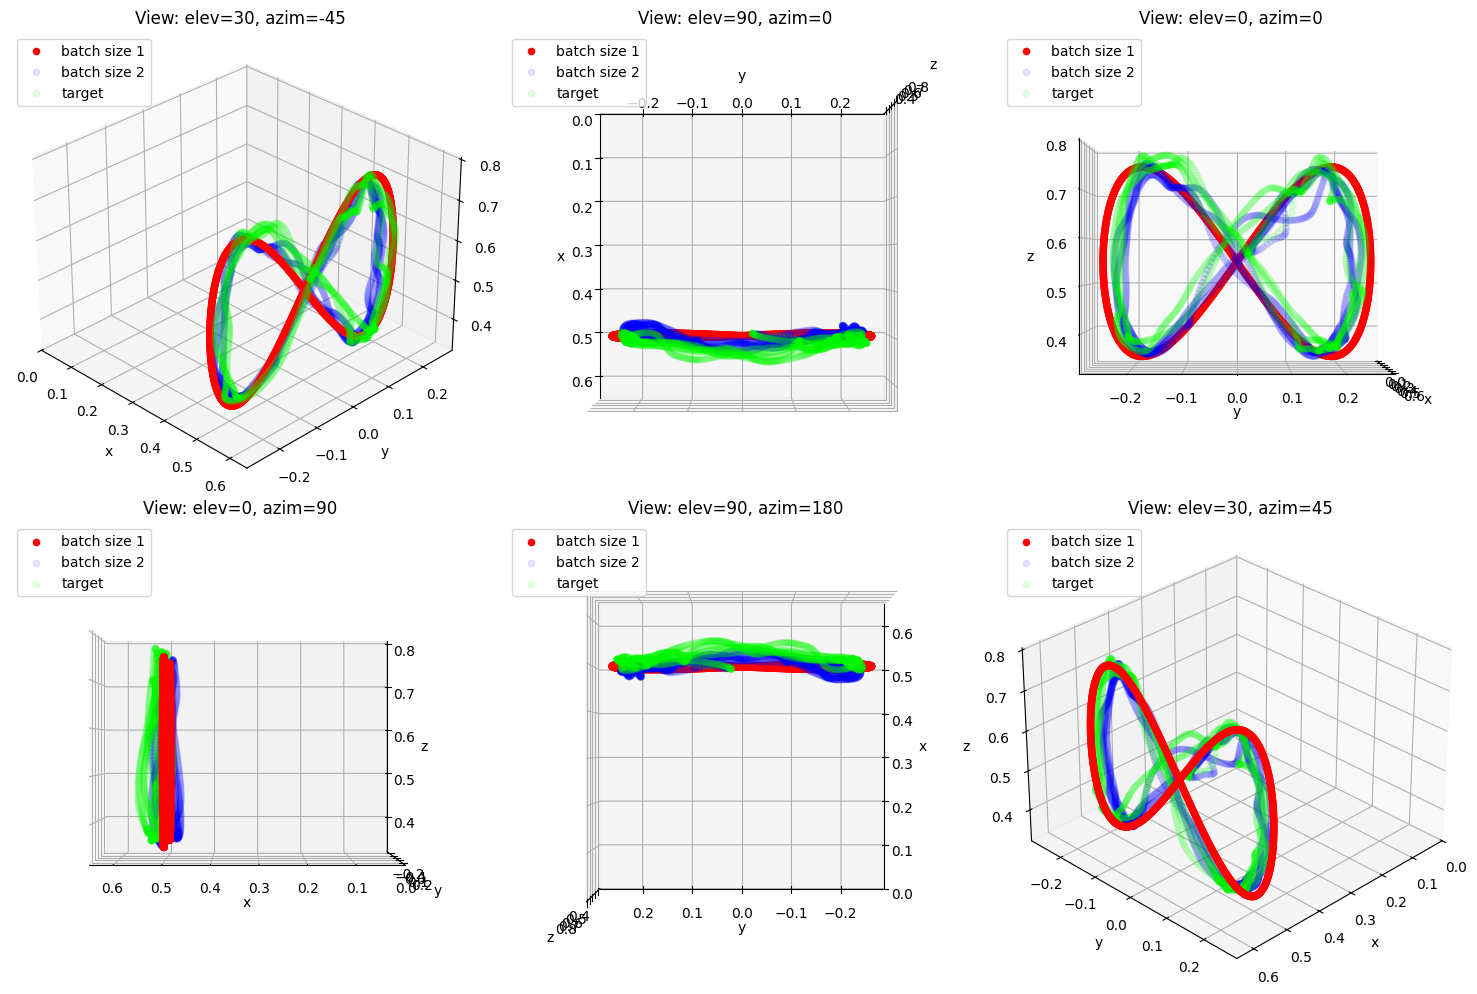

In [43]:
xamplitude = 0.25 # X goes from -xamplitude to xamplitude
zamplitude = 0.4 # Z goes from -zamplitude/2 to zamplitude/2
period = 9 # seconds
dt = 0.01 # seconds
x = lambda t:  0.5 # + 0.1 * np.sin(2*(t + np.pi/4))
y = lambda t: xamplitude * np.sin(t)
z = lambda t: 0.35 + zamplitude * np.sin(2*t)/2 + zamplitude/2
timesteps = np.linspace(0, 2*np.pi, int(period/dt))
points = np.array([[x(t), y(t), z(t)] for t in timesteps])


# change the view to 3d
fig = plt.figure(figsize=(15, 10))

# Define the views we want to show
views = [
    (30, -45),
    (90, 0),   # Top view
    (0, 0),    # Front view
    (0, 90),   # Right view
    (90, 180), # Top-back view
    (30, 45)
]

# Create subplots for each view
for idx, (elev, azim) in enumerate(views, 1):
    ax = fig.add_subplot(2, 3, idx, projection='3d')
    ax.set_xlim(0, .65)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    # Plot dot
    # ax.scatter(baseline[:,0], baseline[:,1], baseline[:,2], c='blue', alpha=0.1)
    # plot fig8
    ax.scatter(points[:,0], points[:,1], points[:,2], c='red', alpha=1)

    # plot fig8
    ax.scatter(baseline[:,0], baseline[:,1], baseline[:,2], c='blue', alpha=0.1)
    ax.scatter(t2[:,0], t2[:,1], t2[:,2], c='lime', alpha=0.1)
    # ax.scatter(0.5, -.1865, 0.7, c='lime', alpha=1, s=200)  # Increased size with s=100
    # ax.set_ylim(-0.2, -0.17)
    # Set the view angle
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f'View: elev={elev}, azim={azim}')
    plt.legend(['batch size 1', 'batch size 2', 'target'], loc='upper left')

plt.tight_layout()
plt.savefig('3d_sinschedule.png')
plt.show()

In [20]:
plt.plot(real_errs)
plt.plot(t1_errs)
plt.legend(['baseline', 'GABRIEL'])
# plt.ylim(0,0.2)
plt.xlim(0,1000)
plt.savefig('errs_sinschedule.png')
plt.show()

NameError: name 'real_errs' is not defined

In [41]:
tmp = np.ones((3,4,5))
mult = np.array([1,2,3])
tmp *= mult.reshape(-1,1,1)
tmp

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]]])